In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

warnings.filterwarnings("ignore")

In [2]:
pd.ExcelFile("../../../data/final_paper.xlsx").sheet_names

['OLD-TRAIN-DS-DIELECTRIC',
 'OLD-TRAIN-DS-EMLE-SPECIES',
 'OLD-TRAIN-DS-EMLE-REFERENCE',
 'TRAIN-DS-DIELECTRIC',
 'TRAIN-DS-EMLE-SPECIES',
 'TRAIN-DS-MMVACUUMME',
 'Sheet4',
 'TEST-DS-MMVACUUMME',
 'TEST-DS-EMLE-SPECIES',
 'TRANSFERABLE-DATASET-KAR']

In [3]:
df_mace_emle = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-EMLE-SPECIES",
    header=1,
    nrows=11,
)

df_ani_emle = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-EMLE-SPECIES",
    skiprows=13,
    nrows=11,
)
df_ani_emle

,Molecule,MM FFs,ML potential,General Model,General Model.1,General Model.2,Patched-Iter2-Species (0.7),Patched-Iter2-Species (0.7).1,Patched-Iter2-Species (0.7).2
0,1896013,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-359306.123353,-359306.112660,-359305.981152
1,2126135,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-242233.250664,-242233.218432,-242233.185766
2,242480,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-501594.513034,-501594.598137,-501594.536758
3,2850833,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-263980.567001,-263981.477732,-263981.491855
4,2958326,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-183477.044603,-183477.151821,-183477.144909
5,3259411,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-216328.974293,-216329.066975,-216329.063313
6,3515580,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-264752.714580,-264753.014471,-264752.945629
7,4587267,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431924.509244,-431924.943184,-431924.597863
8,6917738,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-156669.400118,-156669.421843,-156669.439270
9,9534740,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431173.415899,-431173.211042,-431173.052095


In [4]:
df_mace = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-MMVACUUMME",
    header=1,
    nrows=11,
)

df_ani = pd.read_excel(
    "../../../data/final_paper.xlsx",
    sheet_name="TEST-DS-MMVACUUMME",
    skiprows=13,
    nrows=11,
)
df_ani

,Molecule,MM FFs,ML potential,MM-Rep1,MM-Rep2,MM-Rep3,Vacuum-Rep1,Vacuum-Rep2,Vacuum-Rep3,ME-Rep1,ME-Rep2,ME-Rep3
0,1896013,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-359301.234449,-359301.189644,-359301.148138,-359307.603357,-359308.213636,-359308.954912
1,2126135,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-242232.391448,-242232.398872,-242232.378531,-242232.345905,-242232.371326,-242232.347902
2,242480,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-501595.497072,-501595.540562,-501595.512104,-501596.107103,-501596.014948,-501596.110967
3,2850833,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-263985.759619,-263985.758576,-263985.748936,-263984.739300,-263984.919512,-263984.667595
4,2958326,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-183477.930074,-183477.931844,-183477.973866,-183478.353815,-183478.315159,-183478.308926
5,3259411,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-216327.062093,-216327.030039,-216327.018720,-216327.861510,-216327.846637,-216328.071195
6,3515580,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-264753.329940,-264753.348139,-264753.327932,-264755.373931,-264755.532955,-264754.683074
7,4587267,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431921.203824,-431921.399525,-431921.160227,-431928.202240,-431928.367403,-431927.211860
8,6917738,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-156669.627279,-156669.609258,-156669.663905,-156670.522175,-156670.525404,-156670.532696
9,9534740,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431166.190294,-431166.533611,-431166.478198,-431174.142185,-431174.389659,-431175.675836


In [5]:
df_ani

,Molecule,MM FFs,ML potential,MM-Rep1,MM-Rep2,MM-Rep3,Vacuum-Rep1,Vacuum-Rep2,Vacuum-Rep3,ME-Rep1,ME-Rep2,ME-Rep3
0,1896013,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-359301.234449,-359301.189644,-359301.148138,-359307.603357,-359308.213636,-359308.954912
1,2126135,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-242232.391448,-242232.398872,-242232.378531,-242232.345905,-242232.371326,-242232.347902
2,242480,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-501595.497072,-501595.540562,-501595.512104,-501596.107103,-501596.014948,-501596.110967
3,2850833,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-263985.759619,-263985.758576,-263985.748936,-263984.739300,-263984.919512,-263984.667595
4,2958326,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-183477.930074,-183477.931844,-183477.973866,-183478.353815,-183478.315159,-183478.308926
5,3259411,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-216327.062093,-216327.030039,-216327.018720,-216327.861510,-216327.846637,-216328.071195
6,3515580,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-264753.329940,-264753.348139,-264753.327932,-264755.373931,-264755.532955,-264754.683074
7,4587267,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431921.203824,-431921.399525,-431921.160227,-431928.202240,-431928.367403,-431927.211860
8,6917738,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-156669.627279,-156669.609258,-156669.663905,-156670.522175,-156670.525404,-156670.532696
9,9534740,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431166.190294,-431166.533611,-431166.478198,-431174.142185,-431174.389659,-431175.675836


In [ ]:
# Remove mols to remove
mols_to_remove = [str(mol) for mol in [2126135, 2958326, 3515580, 6917738, 9534740]]

for df in [df_ani, df_ani_emle, df_mace, df_mace_emle]:
    df["Molecule"] = df["Molecule"].astype(str)
    df.drop(df[df["Molecule"].isin(mols_to_remove)].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

df_ani

,Molecule,MM FFs,ML potential,MM-Rep1,MM-Rep2,MM-Rep3,Vacuum-Rep1,Vacuum-Rep2,Vacuum-Rep3,ME-Rep1,ME-Rep2,ME-Rep3
0,1896013,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-359301.234449,-359301.189644,-359301.148138,-359307.603357,-359308.213636,-359308.954912
1,242480,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-501595.497072,-501595.540562,-501595.512104,-501596.107103,-501596.014948,-501596.110967
2,2850833,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-263985.759619,-263985.758576,-263985.748936,-263984.739300,-263984.919512,-263984.667595
3,3259411,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-216327.062093,-216327.030039,-216327.018720,-216327.861510,-216327.846637,-216328.071195
4,4587267,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-431921.203824,-431921.399525,-431921.160227,-431928.202240,-431928.367403,-431927.211860
5,caffeine,OpenFF-2.0.0/TIP3P,ANI-2x,NaN,NaN,NaN,-426723.848289,-426723.804274,-426723.782756,-426723.422736,-426723.521137,-426723.409289


In [7]:
# Define the datasets
VACUUM_COLS = ["Vacuum-Rep1", "Vacuum-Rep2", "Vacuum-Rep3"]
MM_COLS = ["MM-Rep1", "MM-Rep2", "MM-Rep3"]
ME_COLS = ["ME-Rep1", "ME-Rep2", "ME-Rep3"]
EMLE_COLS = [
    "Patched-Iter2-Species (0.7)",
    "Patched-Iter2-Species (0.7).1",
    "Patched-Iter2-Species (0.7).2",
]

# According to https://github.com/MobleyLab/FreeSolv/blob/master/database.txt
EXP_MEAN = [
    -20.52,
    # -5.66,
    -13.43,
    -4.68,
    # -3.65,
    -13.43,
    # -5.94,
    -23.62,
    # -6.55,
    # -25.47,
    -12.64,
]

EXP_STD = [
    0.27,
    # 0.10,
    0.35,
    0.10,
    # 0.60,
    1.00,
    # 0.10,
    0.32,
    # 0.60,
    # 0.22,
    0.74,
]

# Get the data for each dataset
MM = df_mace[MM_COLS]
VACUUM_MACE = df_mace[VACUUM_COLS]
ME_MACE = df_mace[ME_COLS]
VACUUM_ANI = df_ani[VACUUM_COLS]
ME_ANI = df_ani[ME_COLS]

EFF_07_MACE = df_mace_emle[EMLE_COLS]
EFF_07_ANI = df_ani_emle[EMLE_COLS]

In [8]:
# Create EXP dataframe
EXP = pd.DataFrame(
    {
        "EXP1": EXP_MEAN,
        "EXP2": EXP_MEAN,
        "EXP3": EXP_MEAN,
    }
)

In [9]:
# dG
dG_MM = MM.values
dG_ME_ANI = MM.values + ME_ANI.values - VACUUM_ANI.values
dG_ME_MACE = MM.values + ME_MACE.values - VACUUM_MACE.values
dG_EFF_07_ANI = MM.values + EFF_07_ANI.values - VACUUM_ANI.values
dG_EFF_07_MACE = MM.values + EFF_07_MACE.values - VACUUM_MACE.values

# Absolute error of dG
dG_MM_ABS_ERROR = dG_MM - EXP.values
rmse_MM = np.sqrt(np.mean((dG_MM_ABS_ERROR) ** 2))
dG_MM_ABS_ERROR = pd.DataFrame(dG_MM_ABS_ERROR, index=EXP.index, columns=EXP.columns)

dG_ME_ANI_ABS_ERROR = dG_ME_ANI - EXP.values
rmse_ME_ANI = np.sqrt(np.mean((dG_ME_ANI_ABS_ERROR) ** 2))
dG_ME_ANI_ABS_ERROR = pd.DataFrame(
    dG_ME_ANI_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_ME_MACE_ABS_ERROR = dG_ME_MACE - EXP.values
rmse_ME_MACE = np.sqrt(np.mean((dG_ME_MACE_ABS_ERROR) ** 2))
dG_ME_MACE_ABS_ERROR = pd.DataFrame(
    dG_ME_MACE_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_EFF_07_ANI_ABS_ERROR = dG_EFF_07_ANI - EXP.values
rmse_EFF_07_ANI = np.sqrt(np.mean((dG_EFF_07_ANI_ABS_ERROR) ** 2))
dG_EFF_07_ANI_ABS_ERROR = pd.DataFrame(
    dG_EFF_07_ANI_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

dG_EFF_07_MACE_ABS_ERROR = dG_EFF_07_MACE - EXP.values
rmse_EFF_07_MACE = np.sqrt(np.mean((dG_EFF_07_MACE_ABS_ERROR) ** 2))
dG_EFF_07_MACE_ABS_ERROR = pd.DataFrame(
    dG_EFF_07_MACE_ABS_ERROR, index=EXP.index, columns=EXP.columns
)

# Uncertainty
dG_MM_ABS_ERROR_STD = dG_MM_ABS_ERROR.std(axis=1)
dG_ME_ANI_ABS_ERROR_STD = dG_ME_ANI_ABS_ERROR.std(axis=1)
dG_ME_MACE_ABS_ERROR_STD = dG_ME_MACE_ABS_ERROR.std(axis=1)
dG_EFF_07_ANI_ABS_ERROR_STD = dG_EFF_07_ANI_ABS_ERROR.std(axis=1)
dG_EFF_07_MACE_ABS_ERROR_STD = dG_EFF_07_MACE_ABS_ERROR.std(axis=1)

# Sample std error : t_student_coeff * std / sqrt(3)
# STD ERROR OF THE ABSOLUTE ERROR
t_student_coeff = 1
dG_MM_ABS_ERROR_ERROR = t_student_coeff * dG_MM_ABS_ERROR_STD / np.sqrt(3)
dG_ME_ANI_ABS_ERROR_ERROR = t_student_coeff * dG_ME_ANI_ABS_ERROR_STD / np.sqrt(3)
dG_ME_MACE_ABS_ERROR_ERROR = t_student_coeff * dG_ME_MACE_ABS_ERROR_STD / np.sqrt(3)
dG_EFF_07_ANI_ABS_ERROR_ERROR = (
    t_student_coeff * dG_EFF_07_ANI_ABS_ERROR_STD / np.sqrt(3)
)
dG_EFF_07_MACE_ABS_ERROR_ERROR = (
    t_student_coeff * dG_EFF_07_MACE_ABS_ERROR_STD / np.sqrt(3)
)

# Create a dataframe with the data
df_data_mean = pd.DataFrame(
    {
        "Molecule": df_mace["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR.mean(axis=1),
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR.mean(axis=1),
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR.mean(axis=1),
        "MACE (ME)": dG_ME_MACE_ABS_ERROR.mean(axis=1),
        "MACE (EE)": dG_EFF_07_MACE_ABS_ERROR.mean(axis=1),
    }
)

df_data_std = pd.DataFrame(
    {
        "Molecule": df_mace["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR_STD,
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR_STD,
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR_STD,
        "MACE (ME)": dG_ME_MACE_ABS_ERROR_STD,
        "MACE (EE)": dG_EFF_07_MACE_ABS_ERROR_STD,
    }
)

df_data_error = pd.DataFrame(
    {
        "Molecule": df_mace["Molecule"],
        "OpenFF/TIP3P": dG_MM_ABS_ERROR_ERROR,
        "ANI-2x (ME)": dG_ME_ANI_ABS_ERROR_ERROR,
        "ANI-2x (EE)": dG_EFF_07_ANI_ABS_ERROR_ERROR,
        "MACE (ME)": dG_ME_MACE_ABS_ERROR_ERROR,
        "MACE (EE)": dG_EFF_07_MACE_ABS_ERROR_ERROR,
    }
)

In [10]:
print("RMSEs:")
print(f"OpenFF/TIP3P: {rmse_MM}")
print(f"ANI-2x (ME): {rmse_ME_ANI}")
print(f"ANI-2x (EE): {rmse_EFF_07_ANI}")
print(f"MACE (ME): {rmse_ME_MACE}")
print(f"MACE (EE): {rmse_EFF_07_MACE}")

RMSEs:
OpenFF/TIP3P: 3.689693884964684
ANI-2x (ME): 3.0630927250197564
ANI-2x (EE): 0.5088447889594326
MACE (ME): 3.6864222662976665
MACE (EE): 2.0719166890223275


In [15]:
df_long_combined = pd.merge(
    df_data_mean.melt(id_vars="Molecule", var_name="Model", value_name="Mean"),
    df_data_error.melt(id_vars="Molecule", var_name="Model", value_name="Error"),
    on=["Molecule", "Model"],
)

# Change the order so that models appear OpenFF/TIP3P, MACE (ME), MACE (EE), ANI-2x (ME), ANI-2x (EE)
df_long_combined["Model"] = pd.Categorical(
    df_long_combined["Model"],
    categories=["OpenFF/TIP3P", "MACE (ME)", "MACE (EE)", "ANI-2x (ME)", "ANI-2x (EE)"],
    ordered=True,
)

# Chang names
df_long_combined["Model"] = df_long_combined["Model"].replace(
    {
        "OpenFF/TIP3P": "OpenFF/TIP3P",
        "MACE (ME)": "MACE-OFF23(S)/MM",
        "MACE (EE)": "MACE-OFF23(S)/EMLE/MM",
        "ANI-2x (ME)": "ANI-2x/MM",
        "ANI-2x (EE)": "ANI-2x/EMLE/MM",
    }
)

df_long_combined

# Sort by molecule
df_long_combined = df_long_combined.sort_values(by=["Model", "Molecule"])
df_long_combined

,Molecule,Model,Mean,Error
0,1896013,OpenFF/TIP3P,4.372789,0.060086
1,242480,OpenFF/TIP3P,-1.907208,0.073346
2,2850833,OpenFF/TIP3P,-4.806366,0.049739
3,3259411,OpenFF/TIP3P,2.085457,0.031177
4,4587267,OpenFF/TIP3P,3.489716,0.153107
5,caffeine,OpenFF/TIP3P,-4.384474,0.016722
18,1896013,MACE-OFF23(S)/MM,-3.682317,0.203582
19,242480,MACE-OFF23(S)/MM,-2.369690,0.057888
20,2850833,MACE-OFF23(S)/MM,-4.436243,0.147388
21,3259411,MACE-OFF23(S)/MM,-0.393511,0.071457


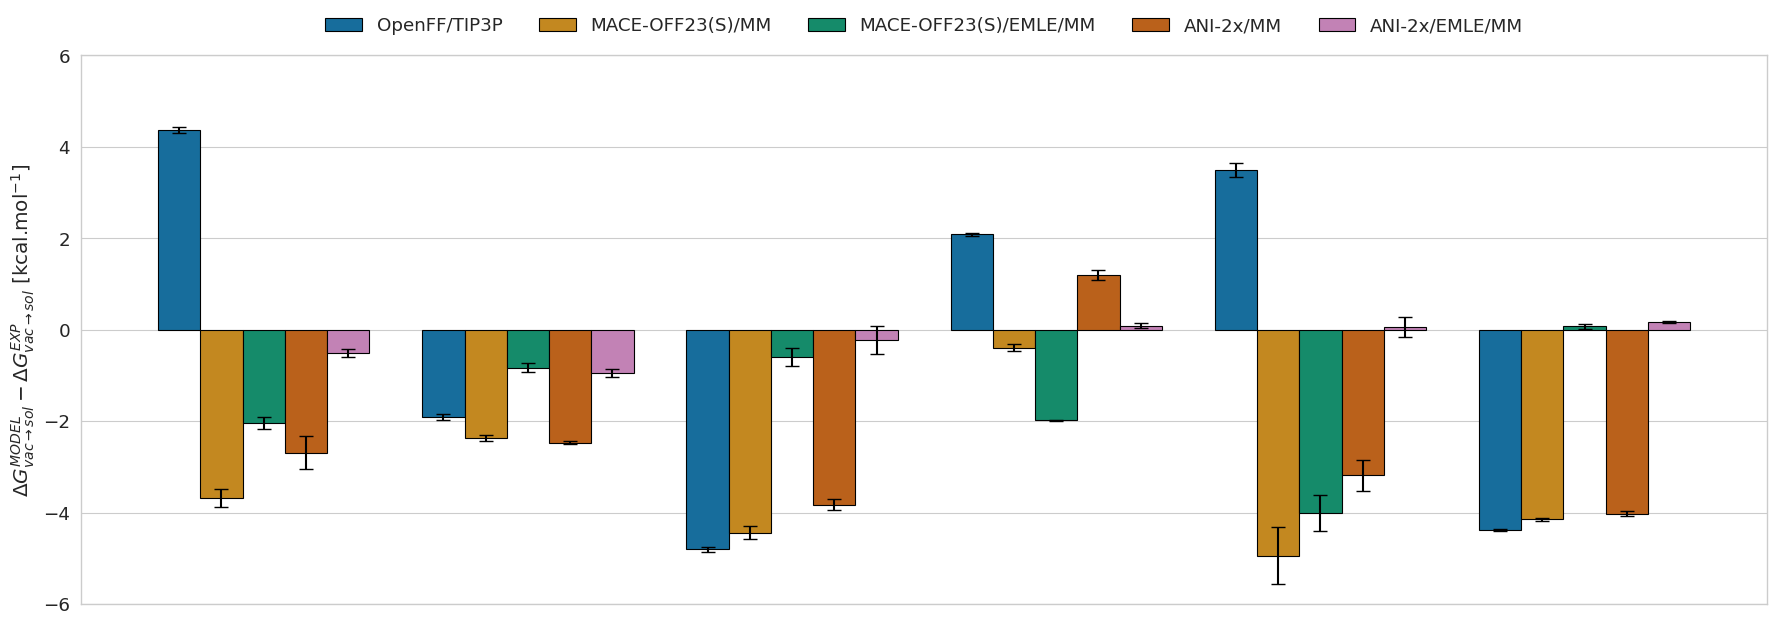

In [16]:
sns.set(style="whitegrid", palette="colorblind", context="paper", font_scale=1.5)
plt.figure(figsize=(18, 6))

# Plot
ax = sns.barplot(
    data=df_long_combined,
    x="Molecule",
    y="Mean",
    hue="Model",
    edgecolor="black",
    capsize=0.2,
    errcolor="black",
    errwidth=1.5,
)

error = df_long_combined["Error"].values
for i, bar in enumerate(ax.patches):
    if i < len(error):  # Add bounds check
        height = bar.get_height()
        x = bar.get_x() + bar.get_width() / 2
        err = error[i]
        ax.errorbar(
            x, height, yerr=err, ecolor="black", capsize=5, fmt="none", linewidth=1.5
        )

plt.ylabel(
    r"$\Delta G^{MODEL}_{vac \rightarrow sol}-\Delta G^{EXP}_{vac \rightarrow sol}$ [kcal.mol$^{-1}$]"
)
plt.xlabel("")
plt.xticks([])
plt.tight_layout()
plt.legend(frameon=False, loc="upper center", bbox_to_anchor=(0.5, 1.10), ncol=5)
ax.set_ylim(-6, 6)
plt.savefig(
    "hfe_errors_transferable_dataset.png",
    dpi=300,
    bbox_inches="tight",
    transparent=True,
)
plt.show()